In [17]:
# Import and enviromental setups

import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
import matplotlib.pyplot as plt
import imagehash
from PIL import Image

# Custom utils functions
from utils.helper_dataset import load
from utils.plotting import create_countplot
from utils.plotting import create_histogram
from utils.plotting import create_k_samples


In [2]:
# Define Variables
path = "../Data/Furniture_Data/"

In [3]:
# Load DataFrame
furniture_dataset = load(path)

Error processing ../Data/Furniture_Data/lamps\Modern\11286modern-lighting.jpg: [Errno 13] Permission denied: '../Data/Furniture_Data/lamps\\Modern\\11286modern-lighting.jpg'


As we load the data, we faced an issue in that we cannot access a lamp image. Upon further inspection, we found that the image is actually a folder and within that folder, there exists no meaningful data. This process will remove the folder and avoid the redundant input from the dataset. 

In [4]:
furniture_dataset.describe()

,Width,Height,Ratio
count,90083.000000,90083.000000,90083.000000
mean,340.858297,340.857698,1.000001
std,32.691822,32.689399,0.000403
min,224.000000,224.000000,1.000000
25%,350.000000,350.000000,1.000000
50%,350.000000,350.000000,1.000000
75%,350.000000,350.000000,1.000000
max,500.000000,446.000000,1.121076


In [5]:
furniture_dataset.head()

,ImgPath,FileType,Width,Height,Ratio,Mode,Bands,Transparency,Animated,Category,Interior_Style
0,beds/Asian/19726asian-daybeds.jpg,jpg,350,350,1.0,RGB,R G B,False,False,beds,Asian
1,beds/Asian/20027asian-canopy-beds.jpg,jpg,350,350,1.0,RGB,R G B,False,False,beds,Asian
2,beds/Asian/20109asian-panel-beds.jpg,jpg,350,350,1.0,RGB,R G B,False,False,beds,Asian
3,beds/Asian/20508asian-platform-beds.jpg,jpg,350,350,1.0,RGB,R G B,False,False,beds,Asian
4,beds/Asian/20750asian-comforters-and-comforter...,jpg,350,350,1.0,RGB,R G B,False,False,beds,Asian


In [6]:
furniture_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90083 entries, 0 to 90082
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ImgPath         90083 non-null  object 
 1   FileType        90083 non-null  object 
 2   Width           90083 non-null  int64  
 3   Height          90083 non-null  int64  
 4   Ratio           90083 non-null  float64
 5   Mode            90083 non-null  object 
 6   Bands           90083 non-null  object 
 7   Transparency    90083 non-null  bool   
 8   Animated        90083 non-null  bool   
 9   Category        90083 non-null  object 
 10  Interior_Style  90083 non-null  object 
dtypes: bool(2), float64(1), int64(2), object(6)
memory usage: 6.4+ MB


In [7]:
furniture_dataset.sample(n = 20, random_state=43) 

,ImgPath,FileType,Width,Height,Ratio,Mode,Bands,Transparency,Animated,Category,Interior_Style
9441,chairs/Contemporary/2923contemporary-dining-ch...,jpg,350,350,1.0,RGB,R G B,False,False,chairs,Contemporary
84542,tables/Modern/11560modern-coffee-and-accent-ta...,jpg,350,350,1.0,RGB,R G B,False,False,tables,Modern
47153,lamps/Craftsman/26694craftsman-table-lamps.jpg,jpg,350,350,1.0,RGB,R G B,False,False,lamps,Craftsman
15179,chairs/Midcentury/18848midcentury-dining-chair...,jpg,350,350,1.0,RGB,R G B,False,False,chairs,Midcentury
32396,dressers/Rustic/5734rustic-dressers.jpg,jpg,350,350,1.0,RGB,R G B,False,False,dressers,Rustic
343,beds/Contemporary/1269contemporary-bunk-beds.jpg,jpg,224,224,1.0,RGB,R G B,False,False,beds,Contemporary
24144,chairs/Transitional/21704transitional-dining-c...,jpg,350,350,1.0,RGB,R G B,False,False,chairs,Transitional
84941,tables/Modern/27.jpg,jpg,350,350,1.0,RGB,R G B,False,False,tables,Modern
15499,chairs/Midcentury/19204midcentury-armchairs-an...,jpg,350,350,1.0,RGB,R G B,False,False,chairs,Midcentury
29792,dressers/Contemporary/309contemporary-dressers...,jpg,350,350,1.0,RGB,R G B,False,False,dressers,Contemporary


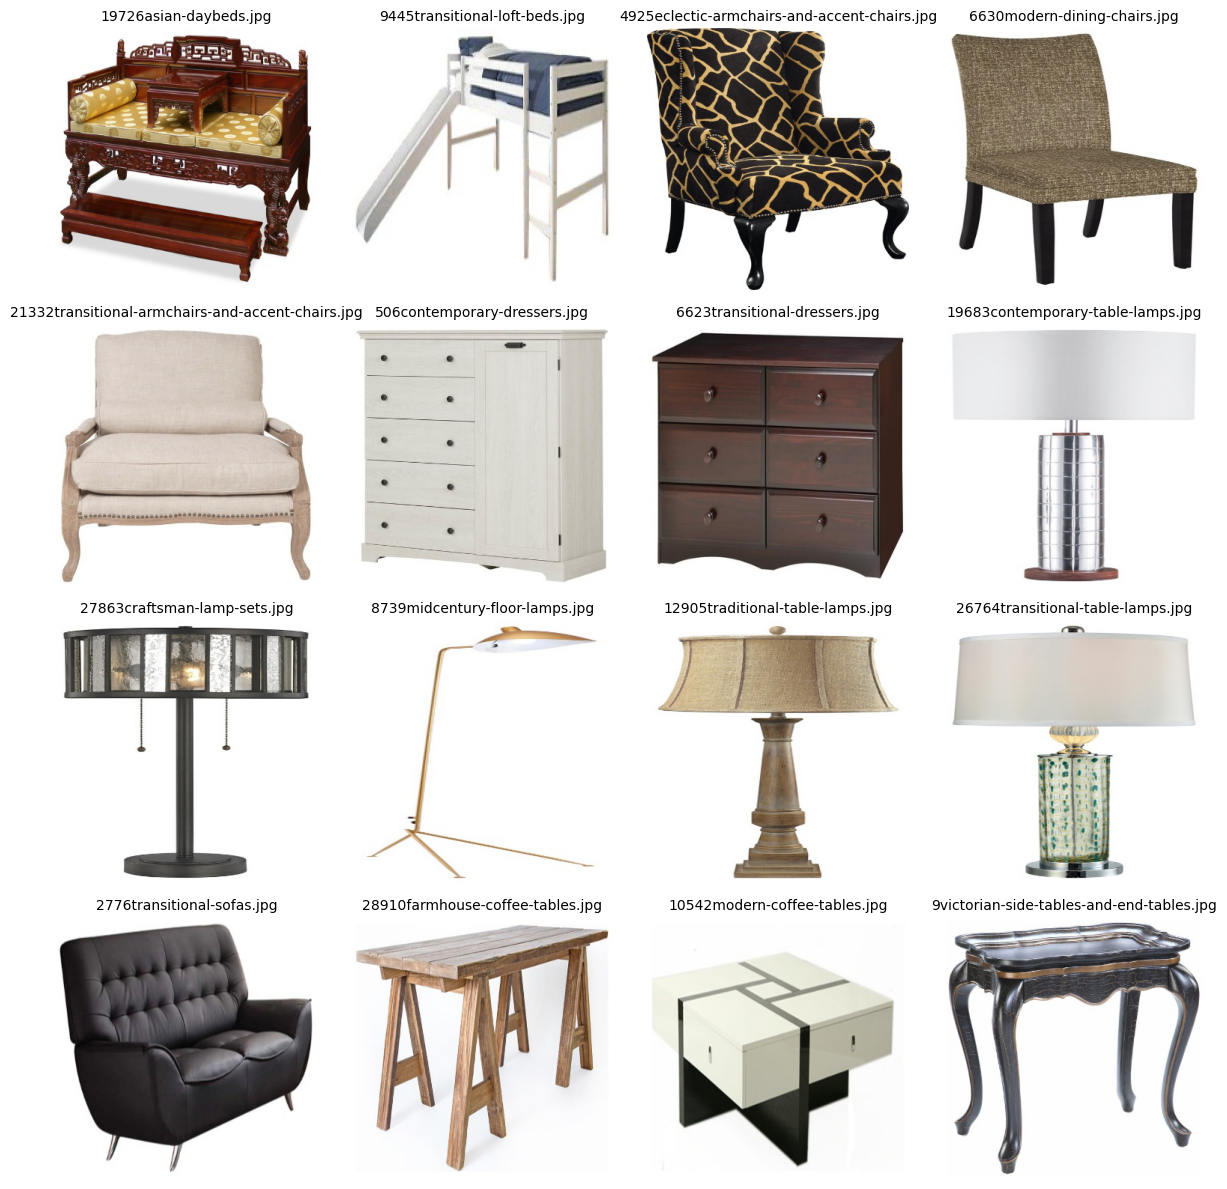

In [14]:
create_k_samples(path, furniture_dataset, k=16)

In [27]:
def find_and_handle_duplicates(df, base_dir, hash_size=8):
    image_hashes = {}
    duplicates_count = 0
    base_dir = os.path.normpath(base_dir) + os.sep

    for index, row in df.iterrows():
        img_path = os.path.join(base_dir, row["ImgPath"])
        try:
            with Image.open(img_path) as img:
                # Convert image hash to a hex string immediately
                img_hash = str(imagehash.average_hash(img, hash_size))
                if img_hash in image_hashes:
                    image_hashes[img_hash].append(row["ImgPath"])
                    duplicates_count += 1
                else:
                    image_hashes[img_hash] = [row["ImgPath"]]
        except IOError as e:
            print(f"Error opening image {img_path}: {e}")

    # Identifying groups with more than one image
    duplicated_image_hashes = {hash_val: paths for hash_val, paths in image_hashes.items() if len(paths) > 1}
    duplicates_list = [(hash_val, path) for hash_val, paths in duplicated_image_hashes.items() for path in paths]
    duplicates_df = pd.DataFrame(duplicates_list, columns=['Hash', 'ImgPath'])

    return duplicates_df

duplicates_df = find_and_handle_duplicates(furniture_dataset, path)

In [28]:
duplicates_df.head()

,Hash,ImgPath
0,f780e004b00dc1ff,beds/Asian/19726asian-daybeds.jpg
1,f780e004b00dc1ff,beds/Asian/7634asian-daybeds.jpg
2,0f0f0f1f0ec0f7ff,beds/Asian/20508asian-platform-beds.jpg
3,0f0f0f1f0ec0f7ff,beds/Asian/3413asian-platform-beds.jpg
4,f70101fffd0080fd,beds/Asian/20750asian-comforters-and-comforter...


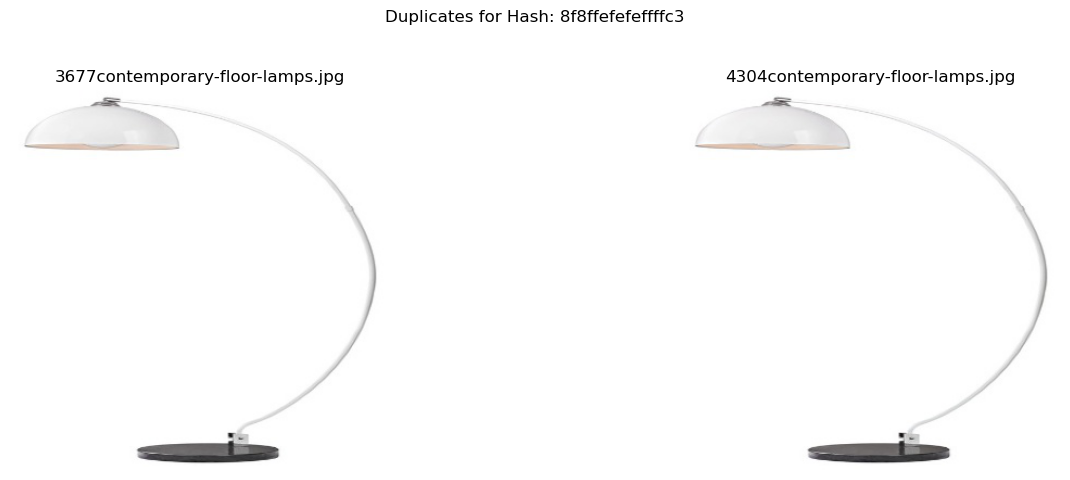

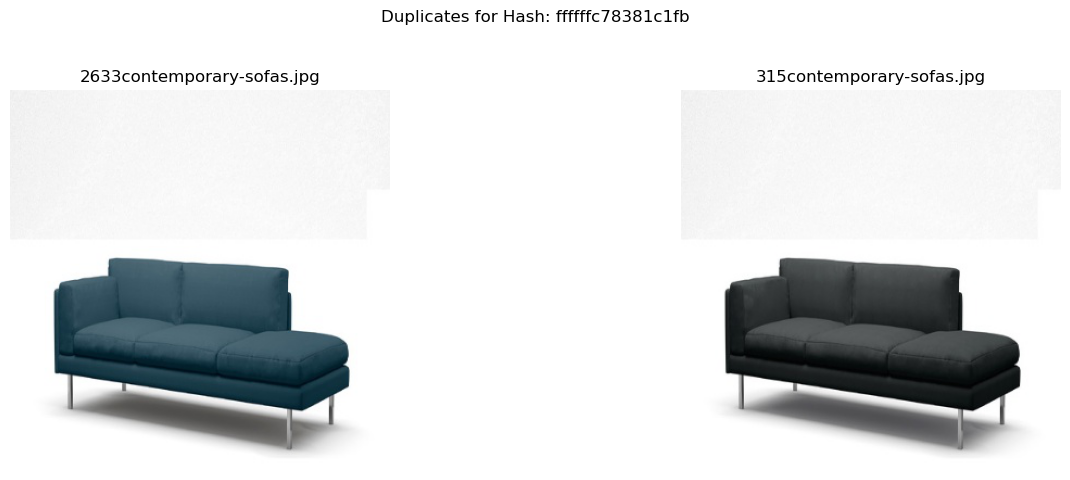

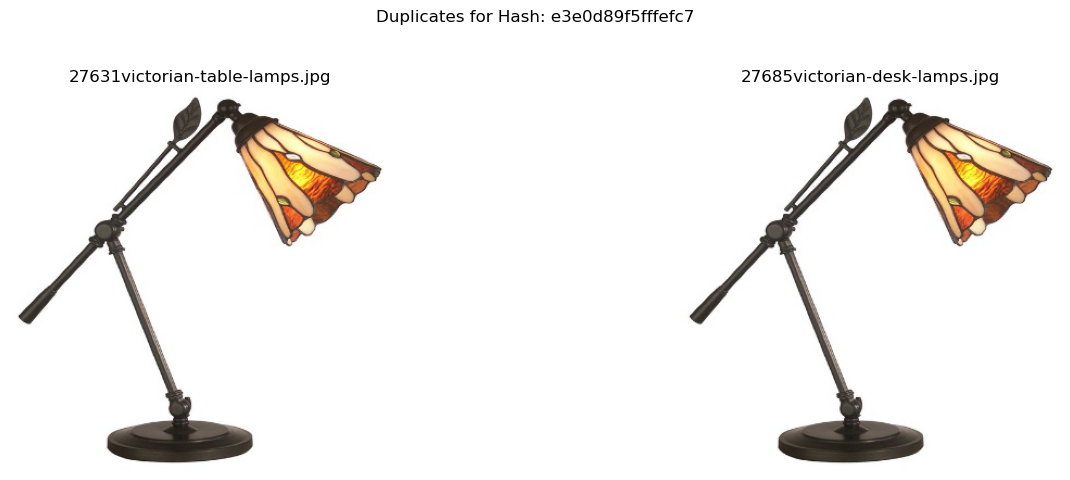

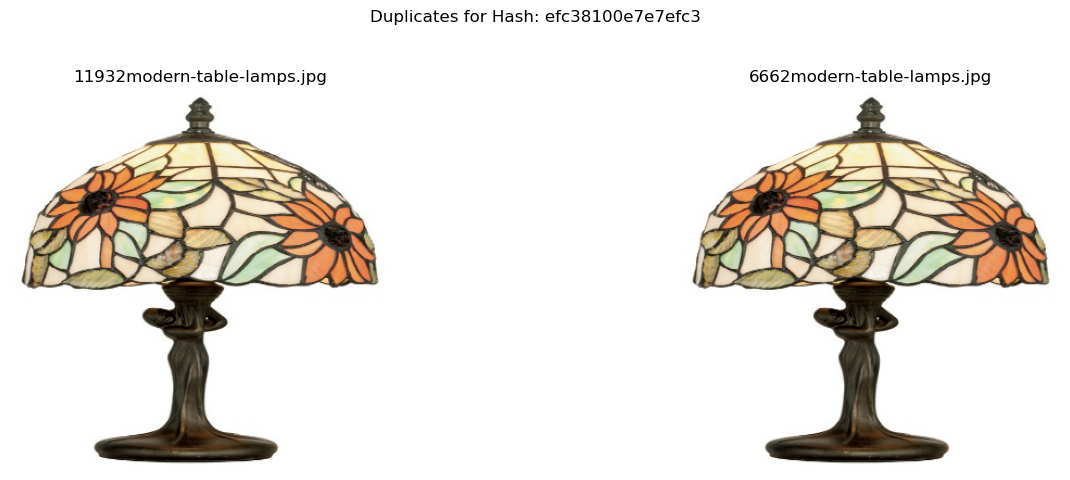

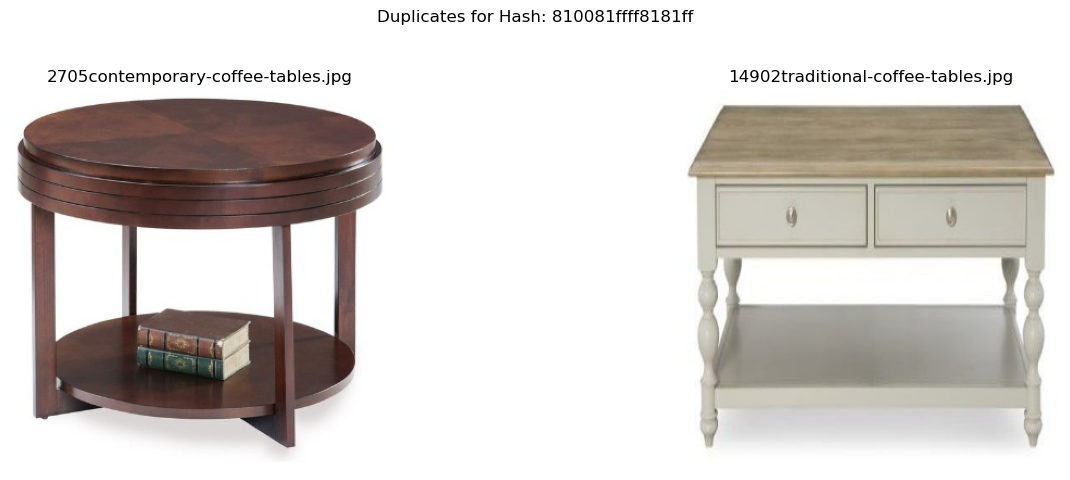

In [32]:
def plot_duplicate_groups(df, base_dir, num_groups=3):
    """
    Plot duplicate images for a given number of groups from the DataFrame.

    Args:
    df (pd.DataFrame): DataFrame containing image paths and their corresponding hashes.
    base_dir (str): Base directory where images are stored.
    num_groups (int): Number of duplicate groups to display.
    """
    # Ensure the path is correctly formatted
    base_dir = os.path.normpath(base_dir) + os.sep
    
    # Group by the hash and filter to get only groups with duplicates
    grouped = df.groupby('Hash').agg(list)
    if len(grouped) > num_groups:
        sampled_groups = grouped.sample(n=num_groups)  # Randomly sample groups if there are many
    else:
        sampled_groups = grouped

    # Plotting
    for hash_val, data in sampled_groups.iterrows():
        fig, axs = plt.subplots(1, len(data['ImgPath']), figsize=(15, 5))
        fig.suptitle(f'Duplicates for Hash: {hash_val}')
        
        if len(data['ImgPath']) == 1:
            axs = [axs]  # Make axs iterable
        
        for ax, img_name in zip(axs, data['ImgPath']):
            img_path = os.path.join(base_dir, img_name)
            try:
                img = Image.open(img_path)
                ax.imshow(img)
                ax.set_title(img_name.split('/')[-1])  # Only show filename
                ax.axis('off')
            except Exception as e:
                print(f"Failed to load image {img_path}: {e}")
                ax.set_title('Failed to load')
                ax.axis('off')

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
        plt.show()


plot_duplicate_groups(duplicates_df, path, 5)

In [34]:
image_hashes = {}
duplicates_count = 0

from tqdm import tqdm

with tqdm(total=len(furniture_dataset), desc='Finding identical images', position=0, leave=True) as pbar:
    for i, row in furniture_dataset.iterrows():
        pbar.update()
        with Image.open(f'{path}{row["ImgPath"]}') as im:
            image_hash = imagehash.average_hash(im, hash_size=8)
            if image_hash in image_hashes:
                image_hashes[image_hash].append(row["ImgPath"])
                duplicates_count += 1
            else:
                image_hashes[image_hash] = [row["ImgPath"]]


duplicated_image_hashes = {hash_val: paths for hash_val, paths in image_hashes.items() if len(paths) > 1} 

Finding identical images: 100%|██████████| 90083/90083 [06:46<00:00, 221.38it/s]
